In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math

(2000, 4)
[[-10.28405055   8.352279     0.75736777   0.87839758]
 [  3.10520436  -2.06289424   0.03638027  -0.88134358]
 [ -6.56568049  -9.55987137  -0.2787528    0.13468287]
 ...
 [ -3.24447021   1.50128716   0.10269618   0.99758521]
 [  4.36105561   3.51962412  -0.93891467  -0.36909164]
 [  9.25182484   7.46434013   0.17209216   0.9250453 ]]


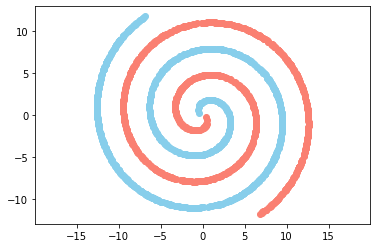

In [3]:
n = 1000

def twospirals(n_samples, noise=.0):
    
    
    n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_samples),np.ones(n_samples))))


X, Y = twospirals(n)
Xsins = np.array([np.sin(X[:,0]),np.sin(X[:,1])]).T
#X2 = np.array([np.power(X[:,0], 2),np.power(X[:,1], 2)]).T
#X = np.array([X[:, 0], X[:, 1], X2[:, 0], X2[:, 1], Xsins[:, 0], Xsins[:, 1]]).T
X = np.array([X[:, 0], X[:, 1], Xsins[:, 0], Xsins[:, 1]]).T
#Xarc = np.array([np.arctan])
print(X.shape)

print(X)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]==0,0], X[Y[:, 0]==0,1], c="skyblue")
plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1,1], c="salmon")
plt.axis("equal")
plt.show()


In [4]:
# Layer

class layer():

  def __init__(self, conn, neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, neur) * 2 - 1
    self.W = np.random.rand(conn, neur) * 2 - 1

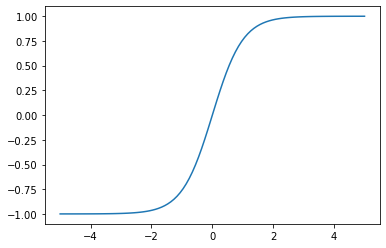

In [5]:
# Function

relu = (lambda x: np.maximum(0, x),
        lambda x: np.array([dr(xn) for xn in x]))

def dr(x):
    if(x >= 0):
        return 1
    else:
        return 0

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: np.e ** (-x) / np.power(1 + np.e ** (-x), 2)) 

tanh = (lambda x: np.tanh(x),
        lambda x: np.power(1 / np.cosh(x), 2))

_x0 = np.linspace(-5, 5, 100)
plt.plot(_x0, tanh[0](_x0))
plt.show()

In [6]:
def create_nn(topology, act_f):

  nn = []

  for l, ly in enumerate(topology[:-1]):
    nn.append(layer(topology[l], topology[l+1], act_f))

  return nn

In [7]:
cost = (lambda yp, yr: np.mean((yr - yp) ** 2),
        lambda yp, yr: yp - yr)

def train(nn, X, Y, cost, lr = 0.3):

  out = [(None, X)] # z and a

  # Forward pass
  for l, ly in enumerate(nn):
    z = out[-1][1] @ nn[l].W + nn[l].b
    a = nn[l].act_f[0](z)

    out.append((z, a))

  # Backward pass

  deltas = []
  for l in reversed(range(0, len(nn))):

    z = out[l + 1][0]
    a = out[l + 1][1]

    if l  == len(nn) - 1:
      delta = cost[1](a, Y) * nn[l].act_f[1](z)
    else:
      delta = deltas[0] @ _W.T * nn[l].act_f[1](z)

    deltas.insert(0, delta)
    _W = nn[l].W

    # Gradient Descent

    nn[l].b -= np.mean(deltas[0], axis= 0, keepdims= True) * lr
    nn[l].W -= out[l][1].T @ deltas[0] * lr

  return out[-1][1]

def predict(nn, X):

  out = [(None, X)]

  for l, ly in enumerate(nn):
    z = out[-1][1] @ nn[l].W + nn[l].b
    a = nn[l].act_f[0](z)
    
    out.append((z, a))

  return out[-1][1]

In [8]:
import time
from IPython.display import clear_output

Resultado más acertado conseguido, falta ajustar parametros

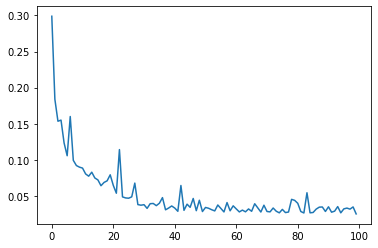

In [9]:
p = 4
topology = [p, 8, 6, 4, 1]

nn = create_nn(topology, sigm)

loss = []

for i in range(10000):

  yp = train(nn, X, Y, cost, lr = 0.01)

  if i % 100 == 0:

    loss.append(cost[0](yp, Y))

    res = 100

    _x0 = np.linspace(-15, 15, res)
    _x1 = np.linspace(-15, 15, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        #_Y[i0][i1] = predict(nn, np.array([x0, x1]))[0][0]
        _Y[i0][i1] = predict(nn, np.array([x0, x1, math.sin(x0), math.sin(x1)]))[0][0]
        #_Y[i0][i1] = predict(nn, np.array([x0, x1, x0 ** 2, x1 ** 2, math.sin(x0), math.sin(x1)]))[0][0]

    clear_output(wait= True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.1)

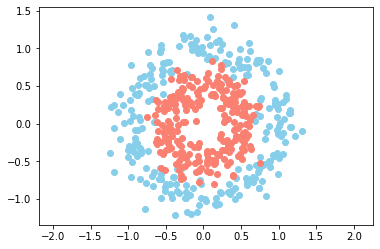

In [93]:
from sklearn.datasets import make_circles

# Creando el dataset

n = 500
p = 2 # Caracteristicas sobre cada uno de los registros

X, Y = make_circles(n_samples= n, factor= 0.5, noise= 0.15) # factor = distancia entre los circulos

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c= 'skyblue')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c= 'salmon')
plt.axis('equal')
plt.show()

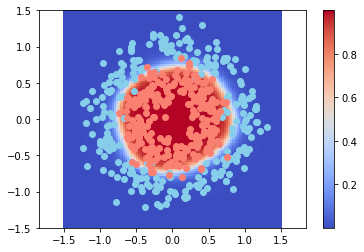

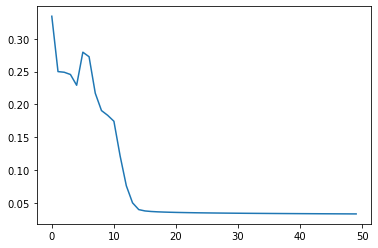

In [95]:
p = 2
topology = [p, 8, 6, 1]

nn = create_nn(topology, sigm)

loss = []

for i in range(5000):

  yp = train(nn, X, Y, cost, lr = 0.02)

  if i % 100 == 0:

    loss.append(cost[0](yp, Y))

    res = 100

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0][i1] = predict(nn, np.array([x0, x1]))[0][0]
        #_Y[i0][i1] = predict(nn, np.array([x0, x1, math.sin(x0), math.sin(x1)]))[0][0]
        #_Y[i0][i1] = predict(nn, np.array([x0, x1, x0 ** 2, x1 ** 2, math.sin(x0), math.sin(x1)]))[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap= 'coolwarm')
    plt.axis('equal')
    plt.colorbar()
    plt.scatter(X[Y[:, 0]==0,0], X[Y[:, 0]==0,1], c="skyblue")
    plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1,1], c="salmon")

    clear_output(wait= True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.1)